[윤기태 / 패스트캠퍼스] 최종 수정일 : 2018. 07. 18

## 데이터 분석을 위한 파이썬 프로그래밍 CAMP - 8회차

### *개발 환경 및 사용 라이브러리*
- 개발환경 : OSX 10.13.2, Anaconda-spyder IDE
- 개발언어 : Python 3.6.1
- 사용모듈 : pandas, numpy, matplotlib

---
***

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3) Example

In [2]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### 3-1) pie chart 활용

In [3]:
# 결측데이터 처리하기 : 기타 대륙으로 통합
drinks.isnull().sum()
drinks.dtypes
drinks['continent'] = drinks['continent'].astype(str)
drinks = drinks.replace('nan', 'OT', regex=True)

In [4]:
print(drinks['continent'].unique().tolist())
print(drinks['continent'].value_counts())

['AS', 'EU', 'AF', 'OT', 'SA', 'OC']
AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64


In [5]:
print(drinks['continent'].value_counts().index.tolist())
print(drinks['continent'].value_counts().values.tolist())

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']
[53, 45, 44, 23, 16, 12]


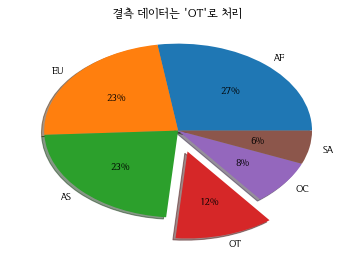

In [6]:
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
mpl.rc('font', family='08SeoulHangang')
mpl.rc('axes', unicode_minus=False)

labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('결측 데이터는 \'OT\'로 처리')
plt.show()

### 3-2) bar chart 활용

In [7]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙 구하기
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]

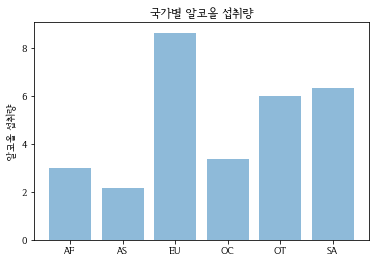

In [12]:
continents = continent_mean.index.tolist()
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
 
plt.bar(x_pos, alcohol, align='center', alpha=0.5)
plt.xticks(x_pos, continents)
plt.ylabel('알코올 섭취량')
plt.title('국가별 알코올 섭취량')
 
plt.show()

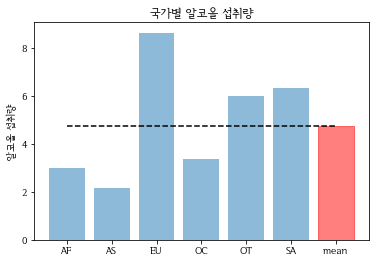

In [14]:
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('알코올 섭취량')
plt.title('국가별 알코올 섭취량')
 
plt.show()

In [13]:
# 평균 beer_servings이 가장 높은 대륙 구하기
continent_group = drinks.groupby('continent')
beer_continent = continent_group.beer_servings.mean().idxmax()
print(beer_continent)

EU


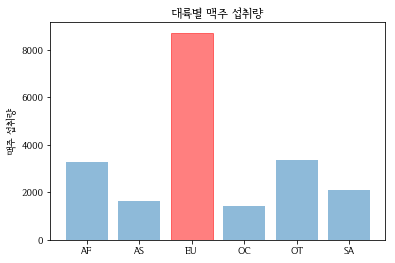

In [15]:
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('맥주 섭취량')
plt.title('대륙별 맥주 섭취량')
 
plt.show()

In [16]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계 구하기
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])

In [17]:
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


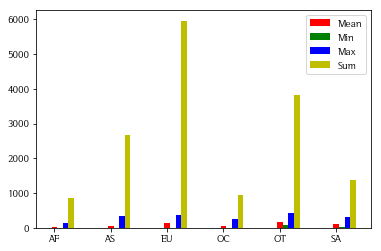

In [18]:
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
# create plot
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

### 3-3) 정렬된 차트 그리기

In [19]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알콜 비율에 대한 칼럼 만들어서 병합하기 -> 독하게 술을 마시는 나라
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 전체 순위 중 한국의 순위 구하기
drinks['alcohol_rate_rank'] = drinks['alcohol_rate'].rank(ascending=False)
drinks['alcohol_rate_rank'] = drinks['alcohol_rate_rank'].apply(np.floor)
drinks.loc[drinks['country'] == 'South Korea'].alcohol_rate_rank

138    15.0
Name: alcohol_rate_rank, dtype: float64

In [20]:
drinks.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate,alcohol_rate_rank
0,Afghanistan,0,0,0,0.0,AS,0,0.000000,187.0
1,Albania,89,132,54,4.9,EU,275,0.017818,120.0
2,Algeria,25,0,14,0.7,AF,39,0.017949,77.0
3,Andorra,245,138,312,12.4,EU,695,0.017842,114.0
4,Angola,217,57,45,5.9,AF,319,0.018495,49.0


In [21]:
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=1)
country_with_rank.head(5)

,country,alcohol_rate
0,Afghanistan,0.0
128,Pakistan,0.0
13,Bangladesh,0.0
90,Kuwait,0.0
111,Monaco,0.0


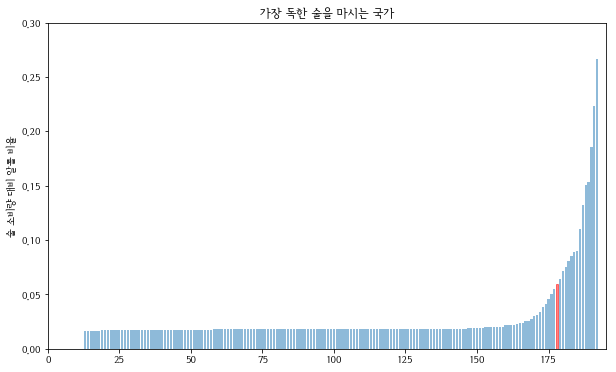

In [109]:
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank, align='center', alpha=0.5)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('술 소비량 대비 알콜 비율')
plt.title('가장 독한 술을 마시는 국가')
plt.axis([0, 195, 0, 0.3])

plt.show()

### 3-4) t-test 시각화하기

In [90]:
# 아프리카와 유럽간의 술 소비량 대비 알콜 비율의 차이 검정하기
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['alcohol_rate'], europe['alcohol_rate'])
tTestResultDiffVar = stats.ttest_ind(africa['alcohol_rate'], europe['alcohol_rate'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is 3.778 and 0.000.
The t-statistic and p-value not assuming equal variances is 4.100 and 0.000


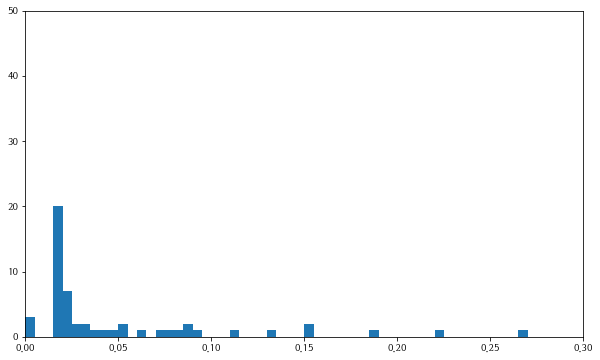

In [124]:
plt.hist(africa['alcohol_rate'], bins=np.arange(0, 0.3, 0.005))
plt.axis([0, 0.3, 0, 50])
plt.show()

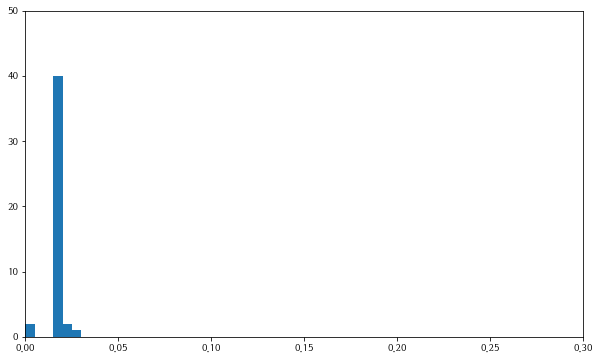

In [125]:
plt.hist(europe['alcohol_rate'], bins=np.arange(0, 0.3, 0.005))
plt.axis([0, 0.3, 0, 50])
plt.show()